In [1]:
# all import statements
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from wordcloud import WordCloud as wc   # not needed
from nltk.corpus import stopwords
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import string
import scipy
import numpy
import nltk
import json
import sys
import csv
import os

In [2]:
# printing versions of the important packages
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

matplotlib: 3.0.2
sklearn: 0.20.1
scipy: 1.1.0
seaborn: 0.9.0
pandas: 0.23.4
numpy: 1.15.4
Python: 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]


In [3]:
# I start Collection Data by reading training and testing datasets 
# into Pandas DataFrames.

train_large = pd.read_csv('Data&Images/train.csv')
test_large = pd.read_csv('Data&Images/test.csv')

train = train_large[:1500]
test = test_large[:100]

In [4]:
# check top 5 records of training dataset
train.head() 

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [5]:
# check top 5 records of testing dataset
test.head() 

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [6]:
# Find the type of features in Quora dataset
# i.e get a quick statistics

print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
qid              1500 non-null object
question_text    1500 non-null object
target           1500 non-null int64
dtypes: int64(1), object(2)
memory usage: 35.2+ KB
None


In [7]:
print(test.info())  # see carefully the last value is -> None. 
                    # indicating that there are no "Null" values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
qid              100 non-null object
question_text    100 non-null object
dtypes: object(2)
memory usage: 1.6+ KB
None


In [8]:
# shape for train and test
print('Shape of train:',train.shape)
print('Shape of test:',test.shape)

Shape of train: (1500, 3)
Shape of test: (100, 2)


In [9]:
# How many NA elements in every column!!
# Good news, it is Zero!
# To check out how many null info are on the dataset, we can use isnull().sum().
# recall from info() -> we found that it has zero Nulls. 

train.isnull().sum()

# data is infact clean and ready for use.

qid              0
question_text    0
target           0
dtype: int64

In [10]:
# in case , their were NA or None values in any row then we would drop the row.

# remove rows that have NA's
print('Before Droping',train.shape)
train = train.dropna()
print('After Droping',train.shape)

Before Droping (1500, 3)
After Droping (1500, 3)


In [11]:
# Number of words in the text

train["num_words"] = train["question_text"].apply(lambda x: len(str(x).split()))
test["num_words"] = test["question_text"].apply(lambda x: len(str(x).split()))
print('maximum of num_words in train',train["num_words"].max())
print('min of num_words in train',train["num_words"].min())
print("maximum of  num_words in test",test["num_words"].max())
print('min of num_words in train',test["num_words"].min())

maximum of num_words in train 51
min of num_words in train 3
maximum of  num_words in test 34
min of num_words in train 3


C:\Users\kamle\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [12]:
# Number of unique words in the text
train["num_unique_words"] = train["question_text"].apply(lambda x: len(set(str(x).split())))
test["num_unique_words"] = test["question_text"].apply(lambda x: len(set(str(x).split())))

print('maximum of num_unique_words in train',train["num_unique_words"].max())

print("maximum of num_unique_words in test",test["num_unique_words"].max())


maximum of num_unique_words in train 44
maximum of num_unique_words in test 30


C:\Users\kamle\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
# Number of stopwords in the text

#from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))

train["num_stopwords"] = train["question_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
test["num_stopwords"] = test["question_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

print('maximum of num_stopwords in train',train["num_stopwords"].max())
print("maximum of num_stopwords in test",test["num_stopwords"].max())


maximum of num_stopwords in train 29
maximum of num_stopwords in test 17


C:\Users\kamle\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [15]:
train["num_punctuations"] = train["question_text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
test["num_punctuations"] = test["question_text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

print('maximum of num_punctuations in train',train["num_punctuations"].max())
print("maximum of num_punctuations in test",test["num_punctuations"].max())


maximum of num_punctuations in train 39
maximum of num_punctuations in test 7


C:\Users\kamle\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
# lets figure out how many unique target values exist.
# like we expect : 0 -> sincere qns and 1 -> un-sincere qns

# You see number of unique item for Target with command below:
train_target = train['target'].values

np.unique(train_target)

array([0, 1], dtype=int64)

In [17]:
train.where(train ['target']==1).count()

qid                 86
question_text       86
target              86
num_words           86
num_unique_words    86
num_stopwords       86
num_punctuations    86
dtype: int64

In [18]:
print("% of un-sincere qns is ", 86/1500)

% of un-sincere qns is  0.05733333333333333


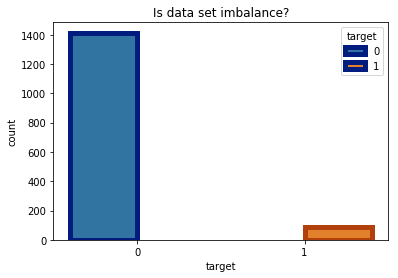

In [19]:
# visualising the imbalance in data set

ax=sns.countplot(x='target',hue="target", data=train  ,linewidth=5,edgecolor=sns.color_palette("dark", 3))
plt.title('Is data set imbalance?');

In [20]:
# step 1: Change all the text to lower case. 

# This is required as python interprets 'quora' and 'QUORA' differently

train['question_text'] = [entry.lower() for entry in train['question_text']]

test['question_text'] = [entry.lower() for entry in test['question_text']]

test.head()

C:\Users\kamle\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,qid,question_text,num_words,num_unique_words,num_stopwords,num_punctuations
0,0000163e3ea7c7a74cd7,why do so many women become so rude and arroga...,21,19,11,1
1,00002bd4fb5d505b9161,when should i apply for rv college of engineer...,30,23,17,2
2,00007756b4a147d2b0b3,what is it really like to be a nurse practitio...,10,10,6,1
3,000086e4b7e1c7146103,who are entrepreneurs?,3,3,2,1
4,0000c4c3fbe8785a3090,is education really making good people nowadays?,7,7,1,1


In [21]:
# more imports for NLP
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [22]:
# step 2 : Tokenization : In this each entry in the corpus will be broken 
#                         into set of words


train['question_text']= [word_tokenize(entry) for entry in train['question_text']]

test['question_text']= [word_tokenize(entry) for entry in test['question_text']]

test.head()

C:\Users\kamle\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,qid,question_text,num_words,num_unique_words,num_stopwords,num_punctuations
0,0000163e3ea7c7a74cd7,"[why, do, so, many, women, become, so, rude, a...",21,19,11,1
1,00002bd4fb5d505b9161,"[when, should, i, apply, for, rv, college, of,...",30,23,17,2
2,00007756b4a147d2b0b3,"[what, is, it, really, like, to, be, a, nurse,...",10,10,6,1
3,000086e4b7e1c7146103,"[who, are, entrepreneurs, ?]",3,3,2,1
4,0000c4c3fbe8785a3090,"[is, education, really, making, good, people, ...",7,7,1,1


In [24]:
# Set random seed
# This is used to reproduce the same result every time 
# if the script is kept consistent otherwise each run 
# will produce different results. The seed can be set to any number.
np.random.seed(500)

In [41]:
# step 3, 4 and 5
# Remove Stop words and Numeric data 
# and perfom Word Stemming/Lemmenting.

# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb
# or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
# the tag_map would map any tag to 'N' (Noun) except
# Adjective to J, Verb -> v, Adverb -> R
# that means if you get a Pronoun then it would still be mapped to Noun


for index,entry in enumerate(train['question_text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    
    # pos_tag function below will provide the 'tag' 
    # i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only 
        # alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
            
    # The final processed set of words for each iteration will be stored 
    # in 'question_text_final'
    #print(type(Final_words))
    temp = pd.DataFrame(Final_words)
    train.append(temp)

    #train.loc[index,'question_text_final'] = str(Final_words)  
    
print(train.head())

C:\Users\kamle\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


                    qid                                      question_text  \
0  00002165364db923c7e6  [how, did, quebec, nationalists, see, their, p...   
1  000032939017120e6e44  [do, you, have, an, adopted, dog, ,, how, woul...   
2  0000412ca6e4628ce2cf  [why, does, velocity, affect, time, ?, does, v...   
3  000042bf85aa498cd78e  [how, did, otto, von, guericke, used, the, mag...   
4  0000455dfa3e01eae3af  [can, i, convert, montra, helicon, d, to, a, m...   

   target  num_words  num_unique_words  num_stopwords  num_punctuations  \
0       0         13                13              7                 1   
1       0         16                15              9                 2   
2       0         10                 8              3                 2   
3       0          9                 9              3                 1   
4       0         15                15              8                 1   

                                 question_text_final  
0  ['quebec', 'nationalis

In [26]:
# step 3, 4 and 5
# Remove Stop words and Numeric data 
# and perfom Word Stemming/Lemmenting.

# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb
# or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
# the tag_map would map any tag to 'N' (Noun) except
# Adjective to J, Verb -> v, Adverb -> R
# that means if you get a Pronoun then it would still be mapped to Noun


for index,entry in enumerate(test['question_text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words_test = []
    
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    
    # pos_tag function below will provide the 'tag' 
    # i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only 
        # alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words_test.append(word_Final)
            
    # The final processed set of words for each iteration will be stored 
    # in 'question_text_final'
    test.loc[index,'question_text_final'] = str(Final_words_test)    

print(test.head())

C:\Users\kamle\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\kamle\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


                    qid                                      question_text  \
0  0000163e3ea7c7a74cd7  [why, do, so, many, women, become, so, rude, a...   
1  00002bd4fb5d505b9161  [when, should, i, apply, for, rv, college, of,...   
2  00007756b4a147d2b0b3  [what, is, it, really, like, to, be, a, nurse,...   
3  000086e4b7e1c7146103                       [who, are, entrepreneurs, ?]   
4  0000c4c3fbe8785a3090  [is, education, really, making, good, people, ...   

   num_words  num_unique_words  num_stopwords  num_punctuations  \
0         21                19             11                 1   
1         30                23             17                 2   
2         10                10              6                 1   
3          3                 3              2                 1   
4          7                 7              1                 1   

                                 question_text_final  
0  ['many', 'woman', 'become', 'rude', 'arrogant'...  
1  ['apply', 'rv',

In [27]:
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(train['question_text_final'])

Train_X_Tfidf = Tfidf_vect.transform(train['question_text_final'])

Test_X_Tfidf = Tfidf_vect.transform(test['question_text_final'])

In [28]:
# You can use the below syntax to see the vocabulary that 
# it has learned from the corpus
print(Tfidf_vect.vocabulary_)

{'quebec': 2722, 'nationalist': 2259, 'see': 2984, 'province': 2687, 'nation': 2256, 'adopt': 56, 'dog': 948, 'would': 3716, 'encourage': 1076, 'people': 2479, 'shop': 3035, 'velocity': 3570, 'affect': 67, 'time': 3402, 'space': 3144, 'geometry': 1402, 'otto': 2407, 'von': 3609, 'guericke': 1475, 'use': 3552, 'magdeburg': 2021, 'hemisphere': 1537, 'convert': 718, 'montra': 2198, 'helicon': 1532, 'mountain': 2216, 'bike': 361, 'change': 543, 'tyre': 3499, 'gaza': 1388, 'slowly': 3095, 'become': 326, 'auschwitz': 254, 'dachau': 798, 'treblinka': 3459, 'palestinian': 2433, 'quora': 2731, 'automatically': 262, 'ban': 293, 'conservative': 689, 'opinion': 2380, 'report': 2840, 'liberal': 1934, 'view': 3586, 'crazy': 748, 'wash': 3630, 'wipe': 3687, 'grocery': 1467, 'germ': 1405, 'everywhere': 1145, 'thing': 3382, 'dress': 974, 'moderately': 2179, 'different': 897, 'modestly': 2182, 'ever': 1138, 'phase': 2499, 'wherein': 3672, 'ignorant': 1625, 'love': 1997, 'completely': 664, 'disregard': 9

In [29]:
print(Train_X_Tfidf)

# Output: 
# 1: Row number of ‘Train_X_Tfidf’, 
# 2: Unique Integer number of each word, 
# 3: Score calculated by TF-IDF Vectorizer

  (0, 2984)	0.359822804791192
  (0, 2722)	0.4769778638491273
  (0, 2687)	0.4769778638491273
  (0, 2259)	0.4769778638491273
  (0, 2256)	0.43359416664199923
  (1, 3716)	0.2211970537062105
  (1, 3035)	0.3979098519972901
  (1, 2479)	0.2137842082034569
  (1, 1076)	0.3979098519972901
  (1, 948)	0.3138745442899514
  (1, 56)	0.700133162739973
  (2, 3570)	0.6684416456097466
  (2, 3402)	0.2074585305121635
  (2, 3144)	0.2940352953682655
  (2, 1402)	0.3342208228048733
  (2, 67)	0.5585574377032303
  (3, 3609)	0.43300022699063984
  (3, 3552)	0.2501080109278229
  (3, 2407)	0.43300022699063984
  (3, 2021)	0.43300022699063984
  (3, 1537)	0.43300022699063984
  (3, 1475)	0.43300022699063984
  (4, 3499)	0.4150402905595966
  (4, 2216)	0.3929578728434521
  (4, 2198)	0.4150402905595966
  :	:
  (1494, 3716)	0.3432699914794571
  (1494, 2034)	0.4956311219272528
  (1494, 814)	0.5051750423988072
  (1495, 2434)	0.6166576437333342
  (1495, 2225)	0.3827735433249775
  (1495, 729)	0.4864245907413059
  (1495, 569)	0.48

In [30]:
print(Test_X_Tfidf)

  (0, 3701)	0.3734896098102999
  (0, 2591)	0.44407671410999455
  (0, 2052)	0.3734896098102999
  (0, 1969)	0.56297174397079
  (0, 1409)	0.28598224619221757
  (0, 326)	0.3536719738205323
  (1, 3281)	0.266996897191993
  (1, 2867)	0.533993794383986
  (1, 1086)	0.4448892146082996
  (1, 647)	0.282000889782967
  (1, 639)	0.41010481106819174
  (1, 181)	0.4448892146082996
  (2, 2780)	0.7966406205496306
  (2, 1948)	0.6044532419387785
  (3, 1098)	1.0
  (4, 2780)	0.507805290077353
  (4, 2479)	0.37088975598639595
  (4, 2032)	0.4024411538554405
  (4, 1435)	0.38222767221616827
  (4, 1025)	0.5445343887666951
  (5, 3441)	0.5278840483427031
  (5, 2995)	0.552242715389823
  (5, 2129)	0.645264608361712
  (6, 785)	1.0
  (7, 2801)	0.5670793676000434
  :	:
  (96, 3638)	0.23352200096193673
  (96, 3383)	0.2276808310607928
  (96, 3192)	0.5257329844491245
  (96, 3014)	0.3051467741065897
  (96, 2372)	0.3003086217111001
  (96, 1816)	0.31049510344839204
  (96, 1204)	0.3403324352703592
  (96, 978)	0.36626305695604744

In [32]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
train_Y = train["target"]

Naive.fit(Train_X_Tfidf,train_Y)

# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)

print(predictions_NB)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [33]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

SVM.fit(Train_X_Tfidf,train['target'])

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)

print(predictions_SVM)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
